In [1]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "145150",
    'client_secret': 'bea0351c69c8572e4f3ceedcc587bbe0bcbaf606',
    'refresh_token': 'a17a418b925debcbaa211bc8393bb701b2b1ea0a',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

print(my_dataset[0]["name"])

Requesting Token...

Access Token = e1e2298f1f2c5b0bf3e698d62b9f869698013c7b

Still a little sore 😅


In [2]:
#Pandas will be the backbone of our data manipulation.
import pandas as pd
#Seaborn is a data visualization library.
import seaborn as sns
#Matplotlib is a data visualization library. 
#Seaborn is actually built on top of Matplotlib. 
import matplotlib.pyplot as plt
#Numpy will help us handle some work with arrays.
import numpy as np
#Datetime will allow Python to recognize dates as dates, not strings.
from datetime import datetime

In [30]:
activities = pd.json_normalize(my_dataset)

In [31]:
activities.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,workout_type,average_watts,max_watts,weighted_average_watts,device_watts,kilojoules
0,2,Still a little sore 😅,2323.0,2156,2172,7.0,Walk,Walk,13731941568,2025-02-26T12:08:57Z,...,1,a13731941568,yuzhExo}mQ@RDFd@HLEb@DvACh@DRAT@RCj@@d@Cz@D`@A...,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Cowtown 50k,50587.0,18671,18693,251.0,Run,Run,13708114769,2025-02-23T13:21:32Z,...,1,a13708114769,e~zfE`~gqQHm\WoFJiO]sIpOC|@Wf@u@qCmEq@_HyCmAuK...,2,0.0,210.3,291.0,211.0,True,3926.5
2,2,Cowtown “shakeout” 5k,5185.0,1714,1729,29.0,Run,Run,13695873741,2025-02-22T13:46:04Z,...,1,a13695873741,i~zfEf~gqQBuGBmAC_DFkME{AA{JGiD@mAAq@I}A@qCASK...,2,0.0,231.3,312.0,231.0,True,396.5
3,2,Pre race weekend miles ft most awesome coach,5423.0,1982,2012,35.0,Run,Run,13686813690,2025-02-21T11:33:44Z,...,1,a13686813690,yy}hEfhanQJ~@Lj@b@~@Tx@Zr@hB~BP\`@j@rAbBj@`Aj@...,2,0.0,211.5,255.0,210.0,True,419.2
4,2,❄️ Run,6536.0,2198,2395,24.0,Run,Run,13668623496,2025-02-19T11:25:39Z,...,1,a13668623496,sszhEbh}mQELEBiBX_DKi@?OBGFIRC|@ENGJSByAH}CBe@...,2,0.0,229.0,274.0,223.0,True,503.3


In [32]:
#activities.shape #See the dimensions of the table.
activities.shape

(200, 59)

In [33]:
#activities.columns #See a list of all columns in the table
activities.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'id', 'start_date',
       'start_date_local', 'timezone', 'utc_offset', 'location_city',
       'location_state', 'location_country', 'achievement_count',
       'kudos_count', 'comment_count', 'athlete_count', 'photo_count',
       'trainer', 'commute', 'manual', 'private', 'visibility', 'flagged',
       'gear_id', 'start_latlng', 'end_latlng', 'average_speed', 'max_speed',
       'average_cadence', 'has_heartrate', 'average_heartrate',
       'max_heartrate', 'heartrate_opt_out', 'display_hide_heartrate_option',
       'elev_high', 'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'suffer_score', 'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'workout_type',
       'average_watts', 'max_watts', 'weighted_average_

In [34]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resource_state                 200 non-null    int64  
 1   name                           200 non-null    object 
 2   distance                       200 non-null    float64
 3   moving_time                    200 non-null    int64  
 4   elapsed_time                   200 non-null    int64  
 5   total_elevation_gain           200 non-null    float64
 6   type                           200 non-null    object 
 7   sport_type                     200 non-null    object 
 8   id                             200 non-null    int64  
 9   start_date                     200 non-null    object 
 10  start_date_local               200 non-null    object 
 11  timezone                       200 non-null    object 
 12  utc_offset                     200 non-null    flo

In [35]:
activities['start_date'] = pd.to_datetime(activities['start_date'])

In [36]:
##Only interested in the dates
activities['start_date'] = activities['start_date'].dt.date

In [37]:
activities['start_date'].head()

0    2025-02-26
1    2025-02-23
2    2025-02-22
3    2025-02-21
4    2025-02-19
Name: start_date, dtype: object

In [38]:
##Filtering out the values to fit only my Houston Half marathon training cycle and cowtown Ultra marathon Training cycle
activities = activities[(activities['start_date'] > datetime.strptime('2024-11-09', '%Y-%m-%d').date()) & (activities['start_date'] < datetime.strptime('2025-02-24', '%Y-%m-%d').date())]
activities.shape

(100, 59)

In [39]:
##Selecting columns of interest
activities = activities[['name', 'start_date', 'distance', 'moving_time', 'average_speed', 'total_elevation_gain','sport_type','kudos_count','achievement_count','average_heartrate']]
activities.head()

,name,start_date,distance,moving_time,average_speed,total_elevation_gain,sport_type,kudos_count,achievement_count,average_heartrate
1,Cowtown 50k,2025-02-23,50587.0,18671,2.709,251.0,Run,91,21,157.9
2,Cowtown “shakeout” 5k,2025-02-22,5185.0,1714,3.025,29.0,Run,51,1,157.5
3,Pre race weekend miles ft most awesome coach,2025-02-21,5423.0,1982,2.736,35.0,Run,40,2,145.8
4,❄️ Run,2025-02-19,6536.0,2198,2.974,24.0,Run,55,0,153.5
5,MA”D”abolic day,2025-02-18,0.0,2531,0.000,0.0,Workout,24,0,119.3


In [40]:
##Cleaning up the values to units that make more sense
activities['distance'] = activities['distance']*0.000621371
activities['distance'] = activities['distance'].round(2)    #Rounding to 2 decimal places
activities['average_speed'] = activities['average_speed']*2.23694 #Converting m/s to mph
activities['total_elevation_gain'] = activities['total_elevation_gain']*3.28084 #Converting meters to feet
activities.head()

,name,start_date,distance,moving_time,average_speed,total_elevation_gain,sport_type,kudos_count,achievement_count,average_heartrate
1,Cowtown 50k,2025-02-23,31.43,18671,6.059870,823.49084,Run,91,21,157.9
2,Cowtown “shakeout” 5k,2025-02-22,3.22,1714,6.766744,95.14436,Run,51,1,157.5
3,Pre race weekend miles ft most awesome coach,2025-02-21,3.37,1982,6.120268,114.82940,Run,40,2,145.8
4,❄️ Run,2025-02-19,4.06,2198,6.652660,78.74016,Run,55,0,153.5
5,MA”D”abolic day,2025-02-18,0.00,2531,0.000000,0.00000,Workout,24,0,119.3


## EDA

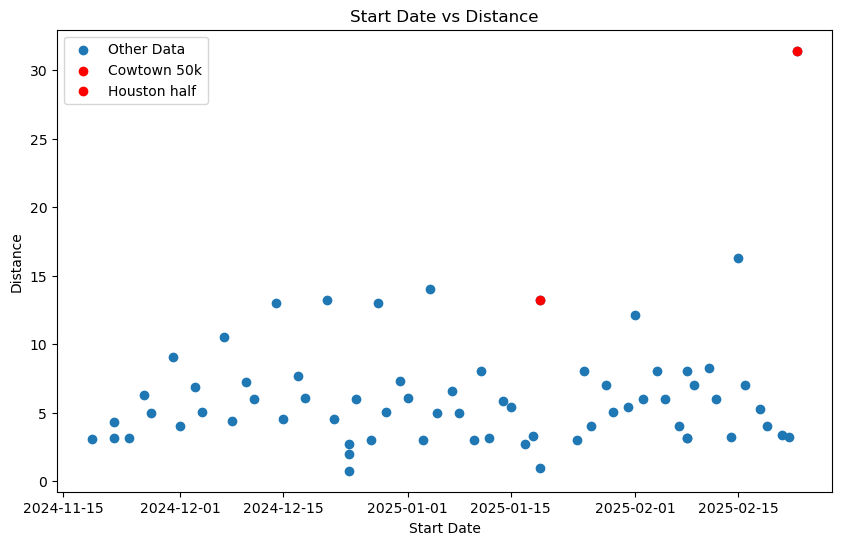

In [46]:
runs = activities[activities['sport_type'] == 'Run']

# Filter the dataframe for Cowtown 50k and Houston half data points
cowtown_data = runs[runs['name'] == 'Cowtown 50k']
houston_data = runs[runs['name'] == 'Houston Half']

# Plot the start_date, distance, and average_speed
plt.figure(figsize=(10, 6))
plt.scatter(runs['start_date'], runs['distance'], label='Other Data')
plt.scatter(cowtown_data['start_date'], cowtown_data['distance'], color='red', label='Cowtown 50k')
plt.scatter(houston_data['start_date'], houston_data['distance'], color='red', label='Houston half')
plt.xlabel('Start Date')
plt.ylabel('Distance')
plt.title('Start Date vs Distance')
plt.legend()
plt.show()


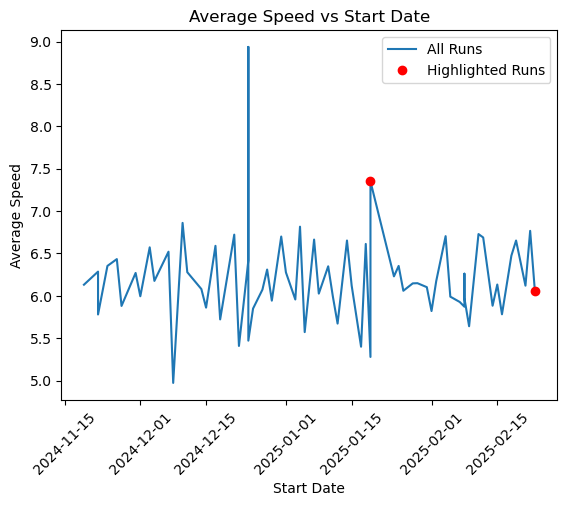

In [50]:

# Filter the runs dataframe to include only Houston Half and Cowtown 50k which were my target races during this period
highlighted_runs = runs[runs['name'].isin(['Houston Half', 'Cowtown 50k'])]

# Plot the average speed vs start date for all runs
plt.plot(runs['start_date'], runs['average_speed'], label='All Runs')

# Plot the average speed vs start date for highlighted runs
plt.plot(highlighted_runs['start_date'], highlighted_runs['average_speed'], 'ro', label='Highlighted Runs')

# Set the x-axis label
plt.xlabel('Start Date')

# Set the y-axis label
plt.ylabel('Average Speed')

# Set the title of the graph
plt.title('Average Speed vs Start Date')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the graph
plt.show()

In [51]:
runs['average_speed'].describe()

count    68.000000
mean      6.206357
std       0.541419
min       4.972718
25%       5.916706
50%       6.140400
75%       6.485448
max       8.936575
Name: average_speed, dtype: float64

In [52]:
## Mile time trail day where I stopped my watch by mistake after completeing on lap around the track
runs[runs['average_speed'] == runs['average_speed'].max()]

,name,start_date,distance,moving_time,average_speed,total_elevation_gain,sport_type,kudos_count,achievement_count,average_heartrate
62,Mile time trial,2024-12-24,0.76,308,8.936575,0.0,Run,36,1,168.8
